In [23]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
edmunds = pd.read_csv("C:\Users\Sean\Desktop\Fall 2016\Text_Analytics\Group Assignment 3\Assignment 3 Edmunds Posts.csv")
senti = pd.read_csv("C:\Users\Sean\Desktop\Fall 2016\Text_Analytics\Group Assignment 3\Assignment 3 Sentiment Scores.csv")

In [38]:
nodes = list(senti.columns.values)

In [45]:
col = senti.columns
ar = []
for i in range(len(col)-1):
    for j in range(len(col)):
        if j>i:
            pos = senti[[col[i],col[j]]][(senti[col[i]]>senti[col[j]])]
            neg = senti[[col[i],col[j]]][senti[col[i]]<senti[col[j]]]
            posv = (pos[col[i]]-pos[col[j]]).sum()
            negv = (neg[col[j]]-neg[col[i]]).sum()
            sen = posv-negv
            ar.append((col[i],col[j],sen))

In [46]:
ar2=[]
for i in ar:
    if i[2]<0:
        ar2.append((i[1],i[0],-i[2]))
    else:
        ar2.append(i)
    

In [47]:
DG=nx.DiGraph()
DG.add_nodes_from(nodes)
DG.add_weighted_edges_from(ar2)

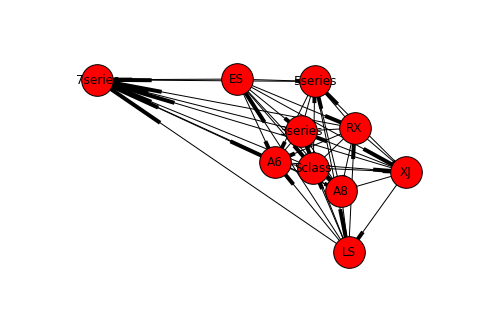

In [62]:
nx.draw(DG, with_labels=True,node_size=1000)